## Pasos del proyecto

1. Elegir temática
    1. **Elegir una temática y buscar datos en función de la misma**. Es algo más complejo que la segunda opción ya que puede ocurrir que no encuentres datos que te sirvan para tu propósito, o que tengas que conseguirlos mediante APIs, scrapping, descarga de BBDD.... No obstante, esta opción es la que más se asemejaría a un caso real, ya que una gran problemática en este tipo de proyectos es encontrar datos.

    2. **Directamente ir a páginas de datos abiertos y escoger un dataset de tu interés**. Si no tienes clara la temática puedes buscar en alguno de los enlaces de datos (recomendable Kaggle) y escoger un tema que te motive.


La tematica será relacionada con las platas solares fotovoltaicas.

Me gustaría conocer si los paises europeos que apuestan por está energía renovable es unicamente por la irradiancia solar que reciben o si hay algún parámetro más que afecte.

He buscando en las siguientes plataformas que datos hay disponibles para europa:

- https://datacommons.org/
    - Poblacion total
    - Esperanza de vida
    - Personas desempleadas
    - Nivel de educación
    - Generación anual de energía solar
    - Capacidad instalada de energía solar
    - Flujo financiero de apoyo a la energía solar
    - Precipitación media
    - Superficie país
- https://datacatalog.worldbank.org
    - Irradiancia solar



2. Obtención de datos. ¿Puedes llevar a cabo el proyecto con estos datos?

De momento espero que los datos sean suficientes. En caso de necesidad, volvería a buscar más información.

3. Define tu hipótesis. ¿Qué piensas que puedes obtener de estos datos? ¿Qué vas a poder resolver? ¿Cómo lo vas a llevar a cabo?

- ¿Qué características tiene un país europeo que apuesta por la energía solar fotovoltaica?
- ¿Dependerá del tipo de población?
    - Habitantes / km2
    - Nivel de educación
    - Esperanza de vida
    - Actividad profesional 
- ¿Dependerá del clima?
    - Precipitaciones medias
- ¿Dependerá de la superficie del país?
    - Superficie km2
    - Superficie verde
- ¿Dependen exclusivamente de la irradiación horizontal global (GHI)? – información de contraste para los 10 países con mayor capacidad de producción


4. Preprocesado: obtén todos los datos de las diferentes fuentes que hayas utilizado, juntalos y ponlos en un formato entendible.

In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Hipótesis de comprobación

Los primeros datos que voy a tratar son los más relevantes para la obtención de las preguntas generadas.
Esta información debe estar alineadada con la capacidad productiva y generada del país. 



In [393]:
df_ = pd.read_excel("./data/solargis_pvpotential_countryranking_2020_data.xlsx", header= 1)

df_.head(3)


,ISO_A3,Country or region,Note,World Bank \nRegion,"Total population, 2018","Total area, 2018",Evaluated area,Level 1 area \n(% of evaluated area),"Human development \nIndex, 2017","Gross domestic product (USD per capita), 2018",...,"Average practical potential \n(PVOUT Level 1, \nkWh/kWp/day), long-term","Average economic potential (LCOE, USD/kWh), 2018","Average PV \nseasonality index, long-term","PV equivalent area (% of total area), long-term","Cummulative installed PV capacity (MWp), 2018","Cummulative installed PV capacity (Wp per capita), 2018","Access to electricity\n(% of rural population), 2016","Electric power consumption (kWh per capita), 2014","Reliability of supply and transparency of tariff index, 2019","Approximate electricity \nTariffs for SMEs \n(US cent/kWh), 2019"
0,ABW,Aruba (Neth.),NaN,Other,105845,180.0,180,0.847926,NaN,25630.266492,...,4.9646,0.0853,1.1803,NaN,6.1,57.631442,92.452844,NaN,NaN,NaN
1,AFG,Afghanistan,NaN,SOA,37172386,652860.0,652860,0.587350,0.497695,520.896603,...,5.0159,0.0851,1.6665,NaN,22.0,0.591837,78.961074,NaN,0.0,17.6
2,AGO,Angola,NaN,AFR,30809762,1246700.0,1246700,0.751833,0.581179,3432.385736,...,4.6586,0.0919,1.3211,0.003,13.4,0.434927,15.984209,312.228825,3.0,4.6


In [394]:
#Quito las columnas que creo que no interesan:
df_.drop(columns=["ISO_A3", "Note", "World Bank \nRegion", "Evaluated area"], inplace=True)
df_.head(3)


,Country or region,"Total population, 2018","Total area, 2018",Level 1 area \n(% of evaluated area),"Human development \nIndex, 2017","Gross domestic product (USD per capita), 2018","Average theoretical potential (GHI, kWh/m2/day), \nlong-term","Average practical potential \n(PVOUT Level 1, \nkWh/kWp/day), long-term","Average economic potential (LCOE, USD/kWh), 2018","Average PV \nseasonality index, long-term","PV equivalent area (% of total area), long-term","Cummulative installed PV capacity (MWp), 2018","Cummulative installed PV capacity (Wp per capita), 2018","Access to electricity\n(% of rural population), 2016","Electric power consumption (kWh per capita), 2014","Reliability of supply and transparency of tariff index, 2019","Approximate electricity \nTariffs for SMEs \n(US cent/kWh), 2019"
0,Aruba (Neth.),105845,180.0,0.847926,NaN,25630.266492,6.1098,4.9646,0.0853,1.1803,NaN,6.1,57.631442,92.452844,NaN,NaN,NaN
1,Afghanistan,37172386,652860.0,0.587350,0.497695,520.896603,5.4904,5.0159,0.0851,1.6665,NaN,22.0,0.591837,78.961074,NaN,0.0,17.6
2,Angola,30809762,1246700.0,0.751833,0.581179,3432.385736,5.7467,4.6586,0.0919,1.3211,0.003,13.4,0.434927,15.984209,312.228825,3.0,4.6


In [395]:
#Como la tabla es muy grande voy a separar por partes los indicadores
titulo =list(df_.columns)
titulo

['Country or region',
 'Total population, 2018',
 'Total area, 2018',
 'Level 1 area \n(% of evaluated area)',
 'Human development \nIndex, 2017',
 'Gross domestic product (USD per capita), 2018',
 'Average theoretical potential (GHI, kWh/m2/day), \nlong-term',
 'Average practical potential \n(PVOUT Level 1, \nkWh/kWp/day), long-term',
 'Average economic potential (LCOE, USD/kWh), 2018',
 'Average PV \nseasonality index, long-term',
 'PV equivalent area (% of total area), long-term',
 'Cummulative installed PV capacity (MWp), 2018',
 'Cummulative installed PV capacity (Wp per capita), 2018',
 'Access to electricity\n(% of rural population), 2016',
 'Electric power consumption (kWh per capita), 2014',
 'Reliability of supply and transparency of tariff index, 2019',
 'Approximate electricity \nTariffs for SMEs \n(US cent/kWh), 2019']

In [396]:
#Un slicing para facilitar el trabajo
#Parametros básicos
df_basic= df_.copy()
df_basic = df_basic.loc[:, titulo[0:6]]
df_basic
#Parametros de plantas
df_pv= df_.copy()
titulo_seleccionado = [titulo[0]] + (titulo[6:11])  #Dos listas sumadas
titulo_seleccionado
df_pv = df_pv.loc[:,titulo_seleccionado]
df_pv
#Parametros del sector
df_sector= df_.copy()
titulo_seleccionado = [titulo[0]] + (titulo[12:17])  #Dos listas sumadas
titulo_seleccionado
df_sector = df_sector.loc[:,titulo_seleccionado]
df_sector

,Country or region,"Cummulative installed PV capacity (Wp per capita), 2018","Access to electricity\n(% of rural population), 2016","Electric power consumption (kWh per capita), 2014","Reliability of supply and transparency of tariff index, 2019","Approximate electricity \nTariffs for SMEs \n(US cent/kWh), 2019"
0,Aruba (Neth.),57.631442,92.452844,NaN,NaN,NaN
1,Afghanistan,0.591837,78.961074,NaN,0.0,17.6
2,Angola,0.434927,15.984209,312.228825,3.0,4.6
3,Albania,0.348873,100.000000,2309.366503,3.0,8.7
4,Andorra,0.000000,100.000000,NaN,NaN,NaN
...,...,...,...,...,...,...
204,Kosovo,NaN,NaN,NaN,2.0,NaN
205,Republic of Yemen,5.263400,57.691162,219.799922,NaN,NaN
206,South Africa,44.285510,67.921435,4197.907047,4.0,14.8
207,Zambia,0.288154,2.657746,717.349168,4.0,4.7


In [397]:
#Estudiamos como esta la info del primer slicing, indicadores básicos
df_basic.info()
#Vamos a renombrar las columnas porque dan problemas, los caracteres raros e intros
df_basic.columns= ["Pais", "Poblacion_2018", "Area_2018", "Area_Evaluada_Porcentaje", "Desarrollo_humano_2017", "PIB_USD_2018"]
df_basic.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 6 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country or region                              209 non-null    object 
 1   Total population, 2018                         209 non-null    int64  
 2   Total area, 2018                               207 non-null    float64
 3   Level 1 area 
(% of evaluated area)            209 non-null    float64
 4   Human development 
Index, 2017                 185 non-null    float64
 5   Gross domestic product (USD per capita), 2018  200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.9+ KB


,Pais,Poblacion_2018,Area_2018,Area_Evaluada_Porcentaje,Desarrollo_humano_2017,PIB_USD_2018
0,Aruba (Neth.),105845,180.0,0.847926,NaN,25630.266492
1,Afghanistan,37172386,652860.0,0.587350,0.497695,520.896603


In [398]:
#Estudiamos como esta la info del segundo slicing, parametros de plantas
df_pv.info()
#Vamos a renombrar las columnas porque dan problemas, los caracteres raros e intros
df_pv.columns= ["Pais", "Irradiancia_Global_Horizontal", "Potencial_kWh/kWp/day", "Coste_Economico_USD/kWh_2018", "BORRAR", "Area_equivalente_PV"]
df_pv.drop(columns=["BORRAR"], inplace=True)
df_pv.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 6 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Country or region                                                      209 non-null    object 
 1   Average theoretical potential (GHI, kWh/m2/day), 
long-term            209 non-null    float64
 2   Average practical potential 
(PVOUT Level 1, 
kWh/kWp/day), long-term  209 non-null    float64
 3   Average economic potential (LCOE, USD/kWh), 2018                       209 non-null    float64
 4   Average PV 
seasonality index, long-term                               209 non-null    float64
 5   PV equivalent area (% of total area), long-term                        135 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.9+ KB


,Pais,Irradiancia_Global_Horizontal,Potencial_kWh/kWp/day,Coste_Economico_USD/kWh_2018,Area_equivalente_PV
0,Aruba (Neth.),6.1098,4.9646,0.0853,NaN
1,Afghanistan,5.4904,5.0159,0.0851,NaN


In [399]:
#Estudiamos como esta la info del tercer slicing, Parametros del sector
df_sector.info()
#Vamos a renombrar las columnas porque dan problemas, los caracteres raros e intros
df_sector.columns= ["Pais", "Capacidad_instalada_2018", "Acceso_electricidad_rural_2016", "Consumo_kWh_per_capita_2014","borrar" ,"Tarifa_luz_USD/kWh"]
df_sector.drop(columns=["borrar"], inplace=True)
df_sector.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 6 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Country or region                                               209 non-null    object 
 1   Cummulative installed PV capacity (Wp per capita), 2018         203 non-null    float64
 2   Access to electricity
(% of rural population), 2016             198 non-null    float64
 3   Electric power consumption (kWh per capita), 2014               137 non-null    float64
 4   Reliability of supply and transparency of tariff index, 2019    183 non-null    float64
 5   Approximate electricity 
Tariffs for SMEs 
(US cent/kWh), 2019  182 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.9+ KB


,Pais,Capacidad_instalada_2018,Acceso_electricidad_rural_2016,Consumo_kWh_per_capita_2014,Tarifa_luz_USD/kWh
0,Aruba (Neth.),57.631442,92.452844,NaN,NaN
1,Afghanistan,0.591837,78.961074,NaN,17.6


5. Limpia los datos: duplicados, missings, columnas inútiles...

In [400]:
#El estudio le vamos a hacer sobre europa, asique voy a filtrar por paises europeos
#Compruebo un pais al azar en inglés para comprobar que machean
cond = df_sector["Pais"] == "Ukraine"
df_sector.loc[cond]


,Pais,Capacidad_instalada_2018,Acceso_electricidad_rural_2016,Consumo_kWh_per_capita_2014,Tarifa_luz_USD/kWh
193,Ukraine,44.88093,100.0,3418.585024,7.1


In [401]:
#Voy a añadir otro dataset población por pais europeo, para cruzar los paises del data set anterior que es mundial para reducir a europa
df_poblacion = pd.read_csv("./data/Europe_Country (4) - poblacion total.csv")
df_poblacion.head(5)
#Renombro los titulos
df_poblacion.columns= ["Diminutivo", "Pais", "Año","Poblacion", "Web"]
# Elimino todas las columnas excepto las de los paises
df_poblacion.drop(columns=["Diminutivo","Año","Poblacion","Web"], inplace=True)

#Tengo info duplicada de varios años, por tanto hay paises repetidos
# Elimino paises duplicados
df_paises = df_poblacion.drop_duplicates()
df_paises.head(3)



,Pais
0,Albania
5,Andorra
6,Armenia


In [402]:
#Voy a cruzar los 3 dataset sol con paises para quedarme solo con europa
df_basic_eu = pd.merge(df_paises,df_basic, on = ["Pais"])
df_basic_eu.sort_values(by = "Pais", inplace=True)
df_basic_eu.head(3)

,Pais,Poblacion_2018,Area_2018,Area_Evaluada_Porcentaje,Desarrollo_humano_2017,PIB_USD_2018
0,Albania,2866376,27400.0,0.614858,0.784911,5253.630064
1,Andorra,77006,470.0,0.110961,0.857684,42029.762737
2,Armenia,2951776,28470.0,0.694657,0.755113,4212.070943


In [403]:
df_pv_eu = pd.merge(df_paises,df_pv, on = ["Pais"])
df_pv_eu.sort_values(by = "Pais", inplace=True)
df_pv_eu.head(3)

,Pais,Irradiancia_Global_Horizontal,Potencial_kWh/kWp/day,Coste_Economico_USD/kWh_2018,Area_equivalente_PV
0,Albania,4.1954,4.0426,0.1051,0.210
1,Andorra,4.0490,4.1990,0.0986,NaN
2,Armenia,4.2241,4.1063,0.1038,0.169


In [404]:
df_sector_eu = pd.merge(df_paises,df_sector, on = ["Pais"])
#Vemos que todos tienen 100% de acceso a electricidad rural, eliminamos la columna 
df_sector_eu.drop(columns=["Acceso_electricidad_rural_2016"], inplace=True)
df_sector_eu.sort_values(by = "Pais", inplace=True)
df_sector_eu.head(3)

,Pais,Capacidad_instalada_2018,Consumo_kWh_per_capita_2014,Tarifa_luz_USD/kWh
0,Albania,0.348873,2309.366503,8.7
1,Andorra,0.000000,NaN,NaN
2,Armenia,5.860878,1961.610395,7.6


In [405]:
#Considero que estos tres dataframe están limpios.


#A los parametros basicos del pais me gustaría añadir la precipitacion media por pais
df_precipitacion_test = pd.read_csv("./data/Europe_Country (4) - precipitacion media.csv")
df_precipitacion_test
#Eliminamos las columnas que no interesan
df_precipitacion_test.drop(columns=["placeDcid","Source:Mean_Rainfall"], inplace=True)
df_precipitacion_test.columns = ["Pais","Fecha","Pp media"]
df_precipitacion_test.head(3)


,Pais,Fecha,Pp media
0,Albania,2024-06-13,0.379518
1,Albania,2024-06-14,1.065580
2,Albania,2024-06-15,0.124470


In [406]:
#Quiero quedarme con los paises europeos
df_precipitacion_eu_test = pd.merge(df_paises, df_precipitacion_test, on= ["Pais"])
df_precipitacion_eu_test.loc[df_precipitacion_eu_test["Pais"] == "Ukraine"]
#Esta información no me vale, necesito la precipitación media anual.
#Hay que buscar otra fuente.   https://data.worldbank.org/indicator/AG.LND.PRCP.MM?skipRedirection=true&view=map

,Pais,Fecha,Pp media
928,Ukraine,2024-06-13,0.632530
929,Ukraine,2024-06-14,0.945423
930,Ukraine,2024-06-15,0.784428
931,Ukraine,2024-06-16,0.450133
932,Ukraine,2024-06-17,0.110714
933,Ukraine,2024-06-18,0.222500
934,Ukraine,2024-06-19,0.232143
935,Ukraine,2024-06-20,0.170956
936,Ukraine,2024-06-21,0.250000
937,Ukraine,2024-06-22,0.312500


In [407]:
#Reintentamos con info nueva
df_precipitacion = pd.read_excel("./data/API_AG.LND.PRCP.MM_DS2_en_excel_v2_1591364.xls", sheet_name="Data", engine="xlrd", header=3)
df_precipitacion
# Nos quedamos con las columnas que nos interesan, Country y pp media de 2018
df_precipitacion = df_precipitacion.loc[:,["Country Name","2018"]]
df_precipitacion.columns = ["Pais", "Precipitacion_media_2018"]
df_precipitacion
#Cruzo con los paises de europa
df_precipitacion_eu = pd.merge(df_paises, df_precipitacion, on= ["Pais"])
df_precipitacion_eu.head(3)
# Ahora que ya tengo toda la info por pais, quiero añadir la precipitación media a los parametros basicos


,Pais,Precipitacion_media_2018
0,Albania,1485.0
1,Andorra,NaN
2,Armenia,562.0


In [408]:
#Vamos a crear un unico dataframe ya que los datos están más o menos tratados
df_eu = pd.merge(df_basic_eu, df_precipitacion_eu, on= "Pais", how = "left")
df_eu = pd.merge(df_eu, df_pv_eu, on= "Pais", how ="left")
df_eu = pd.merge(df_eu, df_sector_eu, on= "Pais", how ="left")
df_eu.head(3)

,Pais,Poblacion_2018,Area_2018,Area_Evaluada_Porcentaje,Desarrollo_humano_2017,PIB_USD_2018,Precipitacion_media_2018,Irradiancia_Global_Horizontal,Potencial_kWh/kWp/day,Coste_Economico_USD/kWh_2018,Area_equivalente_PV,Capacidad_instalada_2018,Consumo_kWh_per_capita_2014,Tarifa_luz_USD/kWh
0,Albania,2866376,27400.0,0.614858,0.784911,5253.630064,1485.0,4.1954,4.0426,0.1051,0.210,0.348873,2309.366503,8.7
1,Andorra,77006,470.0,0.110961,0.857684,42029.762737,NaN,4.0490,4.1990,0.0986,NaN,0.000000,NaN,NaN
2,Armenia,2951776,28470.0,0.694657,0.755113,4212.070943,562.0,4.2241,4.1063,0.1038,0.169,5.860878,1961.610395,7.6


In [409]:
#Sustituimos nulos por 0
df_eu.fillna(0, inplace= True) 
df_eu.head(3)

,Pais,Poblacion_2018,Area_2018,Area_Evaluada_Porcentaje,Desarrollo_humano_2017,PIB_USD_2018,Precipitacion_media_2018,Irradiancia_Global_Horizontal,Potencial_kWh/kWp/day,Coste_Economico_USD/kWh_2018,Area_equivalente_PV,Capacidad_instalada_2018,Consumo_kWh_per_capita_2014,Tarifa_luz_USD/kWh
0,Albania,2866376,27400.0,0.614858,0.784911,5253.630064,1485.0,4.1954,4.0426,0.1051,0.210,0.348873,2309.366503,8.7
1,Andorra,77006,470.0,0.110961,0.857684,42029.762737,0.0,4.0490,4.1990,0.0986,0.000,0.000000,0.000000,0.0
2,Armenia,2951776,28470.0,0.694657,0.755113,4212.070943,562.0,4.2241,4.1063,0.1038,0.169,5.860878,1961.610395,7.6


In [410]:

#Borramos los que tienen capacidad intalada = 0 porque no nos interesan
df_eu_final = df_eu.loc[df_eu["Capacidad_instalada_2018"] != 0]
df_eu_final


,Pais,Poblacion_2018,Area_2018,Area_Evaluada_Porcentaje,Desarrollo_humano_2017,PIB_USD_2018,Precipitacion_media_2018,Irradiancia_Global_Horizontal,Potencial_kWh/kWp/day,Coste_Economico_USD/kWh_2018,Area_equivalente_PV,Capacidad_instalada_2018,Consumo_kWh_per_capita_2014,Tarifa_luz_USD/kWh
0,Albania,2866376,27400.0,0.614858,0.784911,5253.630064,1485.0,4.1954,4.0426,0.1051,0.210,0.348873,2309.366503,8.7
2,Armenia,2951776,28470.0,0.694657,0.755113,4212.070943,562.0,4.2241,4.1063,0.1038,0.169,5.860878,1961.610395,7.6
3,Austria,8847037,82523.0,0.427211,0.907755,51512.905475,1110.0,3.2138,3.2571,0.1094,1.250,161.749069,8355.841952,9.8
4,Azerbaijan,9942334,82670.0,0.823315,0.756965,4721.178087,447.0,4.0422,3.8177,0.1116,0.235,3.661112,2202.393918,5.4
5,Belarus,9485386,202988.0,0.736146,0.807530,6289.938553,618.0,2.9377,2.9485,0.1446,0.355,16.267129,3679.978840,11.7
6,Belgium,11422068,30280.0,0.785623,0.916066,46556.099567,847.0,2.9436,2.9164,0.1219,5.026,352.440556,7709.123078,15.8
7,Bulgaria,7024216,108560.0,0.758937,0.813006,9272.629304,608.0,3.8729,3.7028,0.1147,0.301,147.432824,4708.927458,12.4
8,Croatia,4089400,55960.0,0.726789,0.831102,14869.090682,1113.0,3.7370,3.6306,0.1176,0.292,14.916614,3714.382988,17.6
9,Cyprus,1189265,9240.0,0.883055,0.868784,28159.301700,498.0,5.2104,4.6983,0.0905,0.292,95.016670,3624.971253,14.9
10,Czech Republic,10625695,77220.0,0.750171,0.887561,23078.573487,0.0,3.0809,3.0481,0.1167,1.372,195.516623,6258.891037,12.1


In [411]:
#Guardo el df_eu ya depurado como archivo
df_eu_final.to_csv("./data/df_eu.csv", index=True)

6. Exploratorio: obtén todos los estadísticos y gráficos que necesites para entender bien tu dataset.

In [412]:
#Primeros pasos de un EDA: Hipotesis a contrastar
'''
- ¿Qué características tiene un país europeo que apuesta por la energía solar fotovoltaica?
- ¿Dependerá del tipo de población?
    - Habitantes / km2
    - Nivel de educación
    - Esperanza de vida
    - Actividad profesional 
- ¿Dependerá del clima?
    - Precipitaciones medias
- ¿Dependerá de la superficie del país?
    - Superficie km2
    - Superficie verde
- ¿Dependen exclusivamente de la irradiación horizontal global (GHI)? – información de contraste para los 10 países con mayor capacidad de producción'''

'\n- ¿Qué características tiene un país europeo que apuesta por la energía solar fotovoltaica?\n- ¿Dependerá del tipo de población?\n    - Habitantes / km2\n    - Nivel de educación\n    - Esperanza de vida\n    - Actividad profesional \n- ¿Dependerá del clima?\n    - Precipitaciones medias\n- ¿Dependerá de la superficie del país?\n    - Superficie km2\n    - Superficie verde\n- ¿Dependen exclusivamente de la irradiación horizontal global (GHI)? – información de contraste para los 10 países con mayor capacidad de producción'

In [413]:
df_eu_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 43
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Pais                           39 non-null     object 
 1   Poblacion_2018                 39 non-null     int64  
 2   Area_2018                      39 non-null     float64
 3   Area_Evaluada_Porcentaje       39 non-null     float64
 4   Desarrollo_humano_2017         39 non-null     float64
 5   PIB_USD_2018                   39 non-null     float64
 6   Precipitacion_media_2018       39 non-null     float64
 7   Irradiancia_Global_Horizontal  39 non-null     float64
 8   Potencial_kWh/kWp/day          39 non-null     float64
 9   Coste_Economico_USD/kWh_2018   39 non-null     float64
 10  Area_equivalente_PV            39 non-null     float64
 11  Capacidad_instalada_2018       39 non-null     float64
 12  Consumo_kWh_per_capita_2014    39 non-null     float64
 1

In [414]:
df_eu_final.describe()

,Poblacion_2018,Area_2018,Area_Evaluada_Porcentaje,Desarrollo_humano_2017,PIB_USD_2018,Precipitacion_media_2018,Irradiancia_Global_Horizontal,Potencial_kWh/kWp/day,Coste_Economico_USD/kWh_2018,Area_equivalente_PV,Capacidad_instalada_2018,Consumo_kWh_per_capita_2014,Tarifa_luz_USD/kWh
count,3.900000e+01,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,1.802926e+07,2.272659e+05,0.732962,0.858174,30271.577083,690.230769,3.511308,3.435518,0.112636,1.351590,112.571405,5727.721353,13.310256
std,2.375618e+07,4.474004e+05,0.139894,0.062661,26234.056586,394.382560,0.711955,0.583439,0.018146,1.708145,125.280171,3845.878574,5.921006
min,4.835300e+05,3.200000e+02,0.391344,0.699753,3095.173581,0.000000,2.533000,2.512600,0.067300,0.047000,0.348873,1386.234439,5.000000
25%,3.248830e+06,3.660300e+04,0.662824,0.812099,9321.206534,561.000000,2.940650,2.932100,0.103900,0.296500,12.122657,3697.180914,9.300000
50%,8.847037e+06,8.252300e+04,0.756729,0.868784,22927.744417,637.000000,3.452200,3.386100,0.116300,0.540000,68.073972,5002.406680,12.100000
75%,1.775376e+07,2.680350e+05,0.833023,0.905847,44523.732001,860.500000,3.957550,3.817550,0.124100,1.654000,183.830696,6720.387030,17.100000
max,8.292792e+07,2.699700e+06,0.958701,0.952522,114340.498742,1537.000000,5.210400,4.698300,0.152100,6.646000,553.854467,22999.934595,32.200000


In [415]:
#Cardinalidad funcion
def cardinalidad(df,categoria = 10, continua = 30):
    # Nuevo df con columnas, cardinalidades, % variación cardinalidad, tipo de dato y variables
    df_cardi = pd.DataFrame([df.columns, df.nunique(), df.nunique()/len(df) * 100, df.dtypes])
    df_cardi = df_cardi.T 
    df_cardi = df_cardi.rename(columns = {0:"Columnas" , 1:"Cardinalidad", 2: "Porcentaje_Cardi", 3: "Tipo_dato"}) 

    # Corrección para cuando solo tengo un valor
    df_cardi.loc[df_cardi["Cardinalidad"] == 1, "Porcentaje_Cardi"] = 0.00

    # Tipo de variables
    df_cardi["Variable"] = "Categorica"
    df_cardi.loc[df_cardi["Cardinalidad"] == 2, "Variable"] = "Binaria"
    df_cardi.loc[df_cardi["Cardinalidad"] >= categoria, "Variable"] = "Numerica discreta"
    df_cardi.loc[df_cardi["Porcentaje_Cardi"] >= continua, "Variable"] = "Numerica continua"

    return df_cardi

In [416]:
df_eu_cardi = cardinalidad(df_eu_final)
df_eu_cardi

,Columnas,Cardinalidad,Porcentaje_Cardi,Tipo_dato,Variable
0,Pais,39,100.0,object,Numerica continua
1,Poblacion_2018,39,100.0,int64,Numerica continua
2,Area_2018,39,100.0,float64,Numerica continua
3,Area_Evaluada_Porcentaje,39,100.0,float64,Numerica continua
4,Desarrollo_humano_2017,39,100.0,float64,Numerica continua
5,PIB_USD_2018,39,100.0,float64,Numerica continua
6,Precipitacion_media_2018,35,89.74359,float64,Numerica continua
7,Irradiancia_Global_Horizontal,39,100.0,float64,Numerica continua
8,Potencial_kWh/kWp/day,39,100.0,float64,Numerica continua
9,Coste_Economico_USD/kWh_2018,35,89.74359,float64,Numerica continua


In [417]:
#Vemos que Pais deberia ser categorica
cond2 = df_eu_cardi["Columnas"] == "Pais"
df_eu_cardi.loc[cond2, "Variable"] = "Categorica"
df_eu_cardi


,Columnas,Cardinalidad,Porcentaje_Cardi,Tipo_dato,Variable
0,Pais,39,100.0,object,Categorica
1,Poblacion_2018,39,100.0,int64,Numerica continua
2,Area_2018,39,100.0,float64,Numerica continua
3,Area_Evaluada_Porcentaje,39,100.0,float64,Numerica continua
4,Desarrollo_humano_2017,39,100.0,float64,Numerica continua
5,PIB_USD_2018,39,100.0,float64,Numerica continua
6,Precipitacion_media_2018,35,89.74359,float64,Numerica continua
7,Irradiancia_Global_Horizontal,39,100.0,float64,Numerica continua
8,Potencial_kWh/kWp/day,39,100.0,float64,Numerica continua
9,Coste_Economico_USD/kWh_2018,35,89.74359,float64,Numerica continua


In [418]:
#Añadimos al dataframe, Descripcion, Importancia
descripcion = ["Pais en ingles",
                "Habitantes",
                "Superficie",
                "Superficie estudiada en terminos de energía solar", 
                "Indicador donde 100 es el máximo desarrollo",
                "Producto Interior Bruto del pais en dolares", 
                "Precipitacion media",
                "Irraciandia global horizonal",
                "Cantidad de energía que produce cada kilovatio pico del sistema solar fotovoltaico en un día",
                "Coste de implantación (kWh), a menor coste más rentabilidad",
                "Area invertida en plantas fotovoltaicas",
                "(Wp per capita) Capacidad ya instalada en el pais",
                "Consumo energía de la población",
                "Precio de tarifa de la luz"]
importancia =  ["0",
                "2",
                "1",
                "2", 
                "2",
                "2",
                "1", 
                "1",
                "0",
                "0",
                "1",
                "0",
                "2",
                "2"]
df_eu_cardi.insert(1,"Descripción", descripcion )
df_eu_cardi.insert(2,"Importancia", importancia )
df_eu_cardi


,Columnas,Descripción,Importancia,Cardinalidad,Porcentaje_Cardi,Tipo_dato,Variable
0,Pais,Pais en ingles,0,39,100.0,object,Categorica
1,Poblacion_2018,Habitantes,2,39,100.0,int64,Numerica continua
2,Area_2018,Superficie,1,39,100.0,float64,Numerica continua
3,Area_Evaluada_Porcentaje,Superficie estudiada en terminos de energía solar,2,39,100.0,float64,Numerica continua
4,Desarrollo_humano_2017,Indicador donde 100 es el máximo desarrollo,2,39,100.0,float64,Numerica continua
5,PIB_USD_2018,Producto Interior Bruto del pais en dolares,2,39,100.0,float64,Numerica continua
6,Precipitacion_media_2018,Precipitacion media,1,35,89.74359,float64,Numerica continua
7,Irradiancia_Global_Horizontal,Irraciandia global horizonal,1,39,100.0,float64,Numerica continua
8,Potencial_kWh/kWp/day,Cantidad de energía que produce cada kilovatio...,0,39,100.0,float64,Numerica continua
9,Coste_Economico_USD/kWh_2018,"Coste de implantación (kWh), a menor coste más...",0,35,89.74359,float64,Numerica continua


In [419]:
# La columna Pais hará de índice por lo que vemos el df
df_eu_final.set_index("Pais", inplace=True)
df_eu_final

,Poblacion_2018,Area_2018,Area_Evaluada_Porcentaje,Desarrollo_humano_2017,PIB_USD_2018,Precipitacion_media_2018,Irradiancia_Global_Horizontal,Potencial_kWh/kWp/day,Coste_Economico_USD/kWh_2018,Area_equivalente_PV,Capacidad_instalada_2018,Consumo_kWh_per_capita_2014,Tarifa_luz_USD/kWh
Pais,,,,,,,,,,,,,
Albania,2866376,27400.0,0.614858,0.784911,5253.630064,1485.0,4.1954,4.0426,0.1051,0.210,0.348873,2309.366503,8.7
Armenia,2951776,28470.0,0.694657,0.755113,4212.070943,562.0,4.2241,4.1063,0.1038,0.169,5.860878,1961.610395,7.6
Austria,8847037,82523.0,0.427211,0.907755,51512.905475,1110.0,3.2138,3.2571,0.1094,1.250,161.749069,8355.841952,9.8
Azerbaijan,9942334,82670.0,0.823315,0.756965,4721.178087,447.0,4.0422,3.8177,0.1116,0.235,3.661112,2202.393918,5.4
Belarus,9485386,202988.0,0.736146,0.807530,6289.938553,618.0,2.9377,2.9485,0.1446,0.355,16.267129,3679.978840,11.7
Belgium,11422068,30280.0,0.785623,0.916066,46556.099567,847.0,2.9436,2.9164,0.1219,5.026,352.440556,7709.123078,15.8
Bulgaria,7024216,108560.0,0.758937,0.813006,9272.629304,608.0,3.8729,3.7028,0.1147,0.301,147.432824,4708.927458,12.4
Croatia,4089400,55960.0,0.726789,0.831102,14869.090682,1113.0,3.7370,3.6306,0.1176,0.292,14.916614,3714.382988,17.6
Cyprus,1189265,9240.0,0.883055,0.868784,28159.301700,498.0,5.2104,4.6983,0.0905,0.292,95.016670,3624.971253,14.9


In [420]:
#Haremos un analisis univariante de las columnas con importancia 0
df_eu_cardi.loc[df_eu_cardi["Importancia"] == "0"]

,Columnas,Descripción,Importancia,Cardinalidad,Porcentaje_Cardi,Tipo_dato,Variable
0,Pais,Pais en ingles,0,39,100.0,object,Categorica
8,Potencial_kWh/kWp/day,Cantidad de energía que produce cada kilovatio...,0,39,100.0,float64,Numerica continua
9,Coste_Economico_USD/kWh_2018,"Coste de implantación (kWh), a menor coste más...",0,35,89.74359,float64,Numerica continua
11,Capacidad_instalada_2018,(Wp per capita) Capacidad ya instalada en el pais,0,39,100.0,float64,Numerica continua


In [421]:
def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

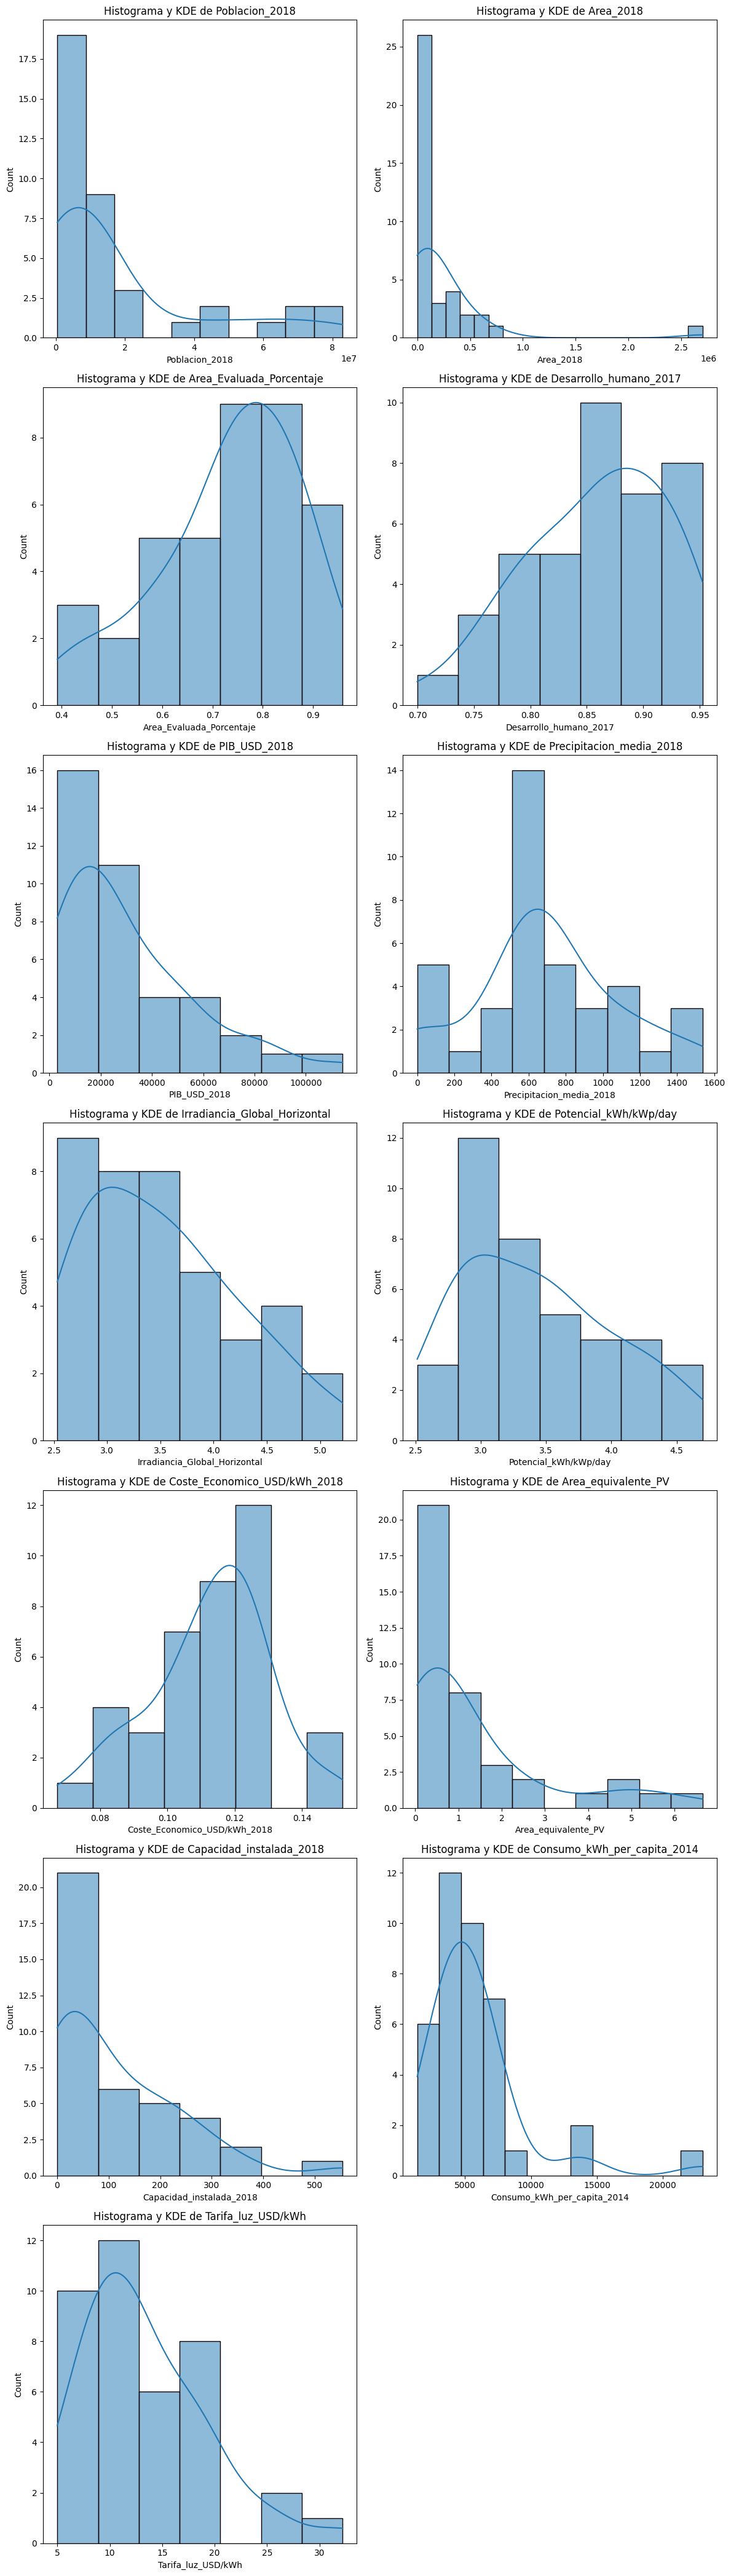

In [422]:
#Vemos todos los histogramas
plot_histo_dens(df_eu_final, df_eu_final.columns)

In [423]:
#De los histogramas me surgen preguntas
'''
1. Graficas relevantes: precipitación, potencial, potencial económico,consumo percapita, tarifa de la luz
2. Potencial y potencial económico son los mismos paises y estamos repitiendo datos?
3. Area equivalete y capacidad instalada son equivalentes

'''

'\n1. Graficas relevantes: precipitación, potencial, potencial económico,consumo percapita, tarifa de la luz\n2. Potencial y potencial económico son los mismos paises y estamos repitiendo datos?\n3. Area equivalete y capacidad instalada son equivalentes\n\n'

In [424]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


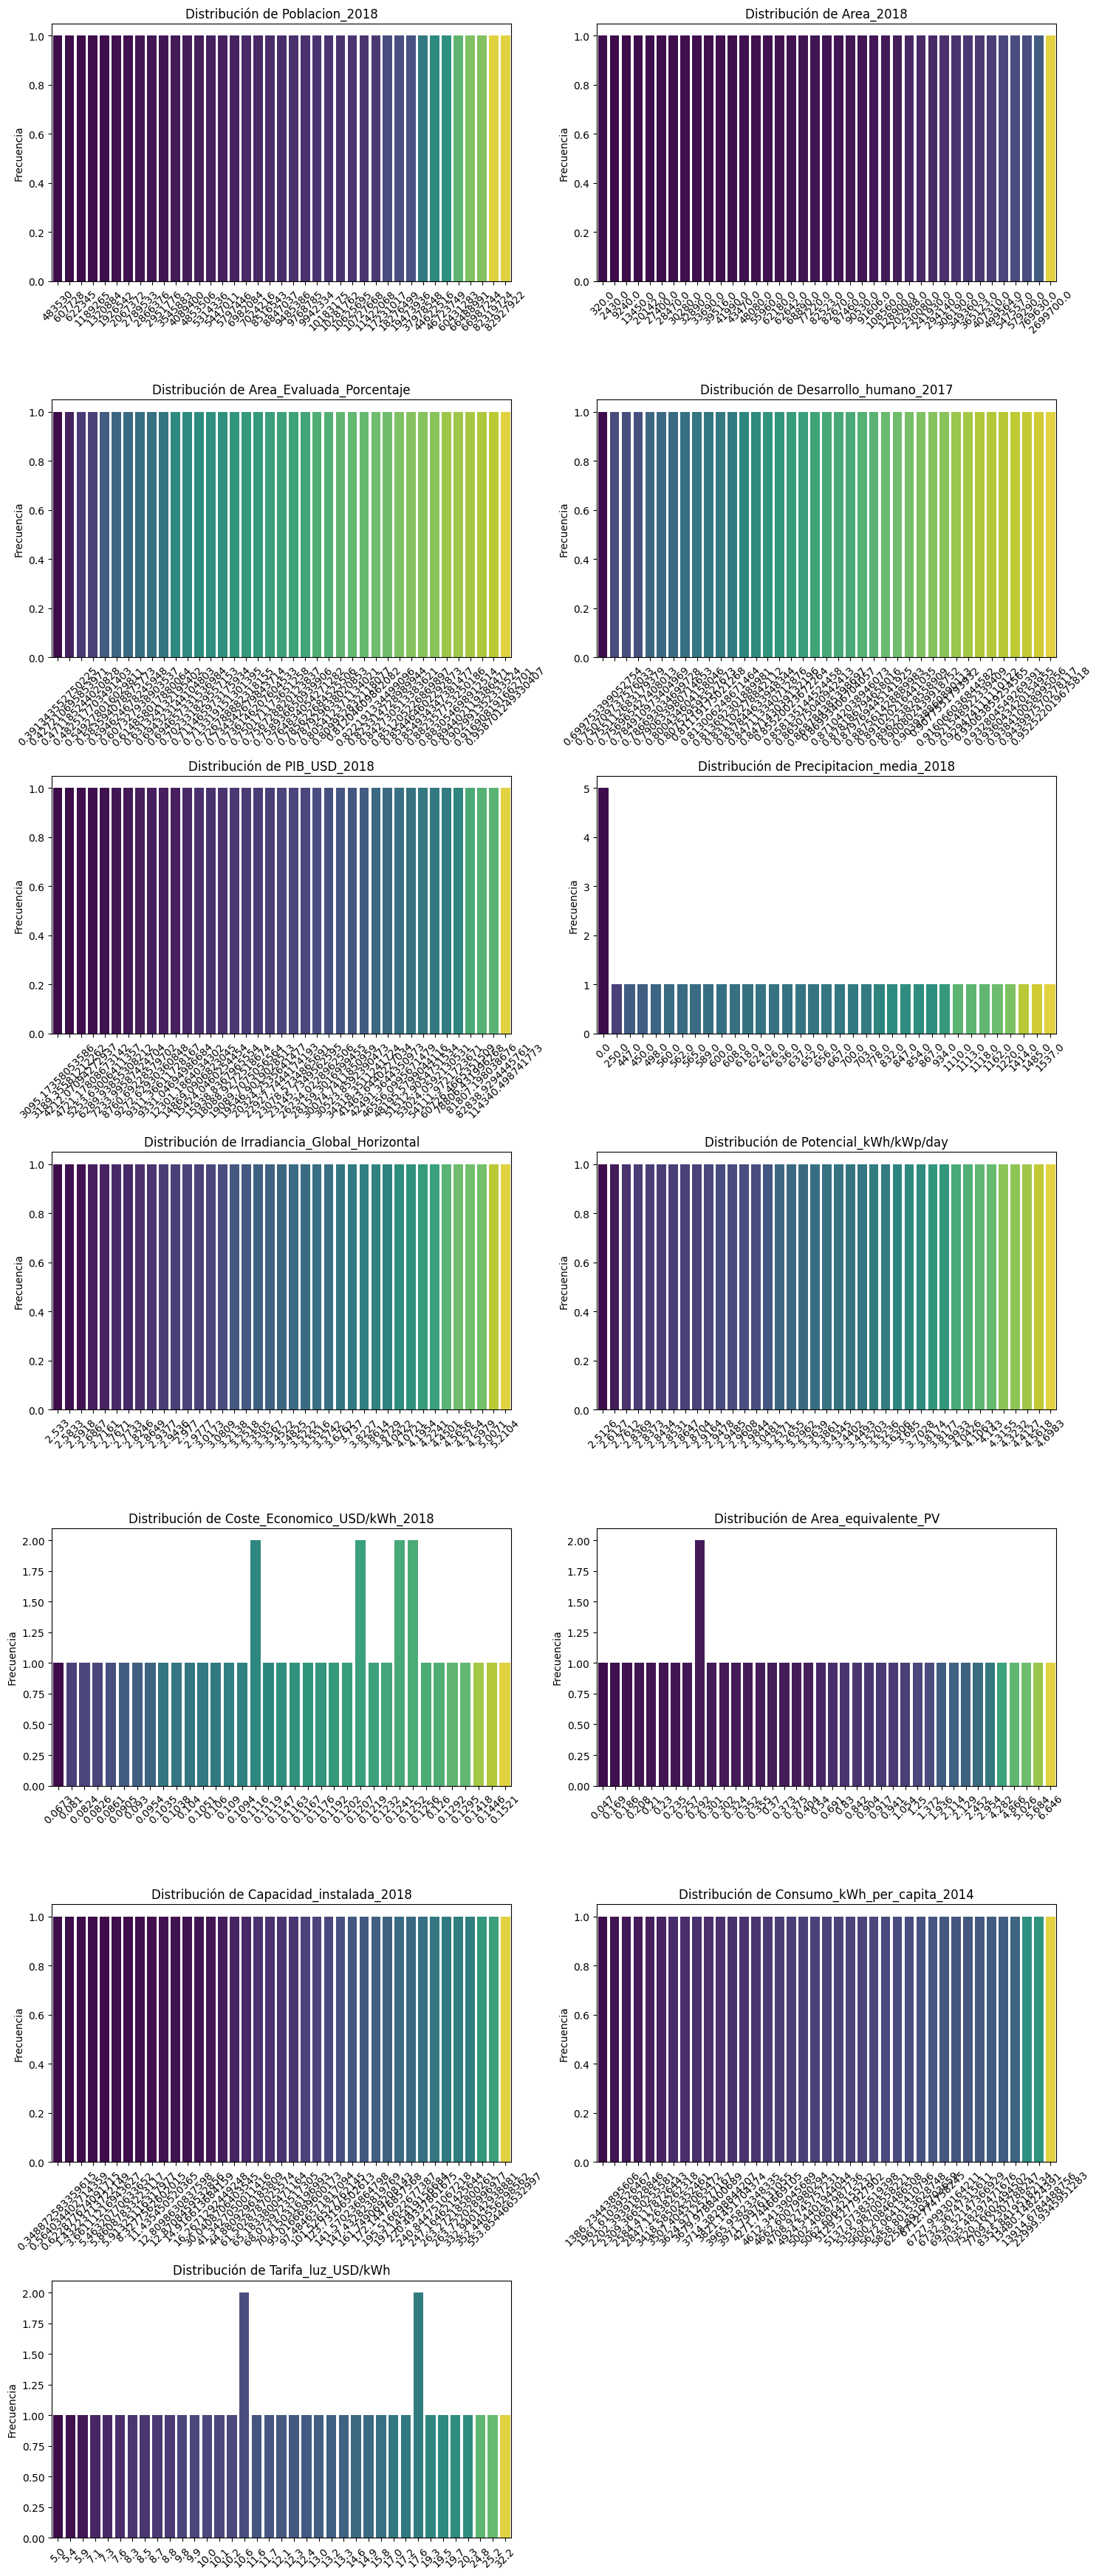

In [425]:
pinta_distribucion_categoricas(df_eu_final, df_eu_final.columns, relativa=False, mostrar_valores=False)
#Estas graficas apenas nos reportan info, tiene más importancia analizar bivariante

In [426]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

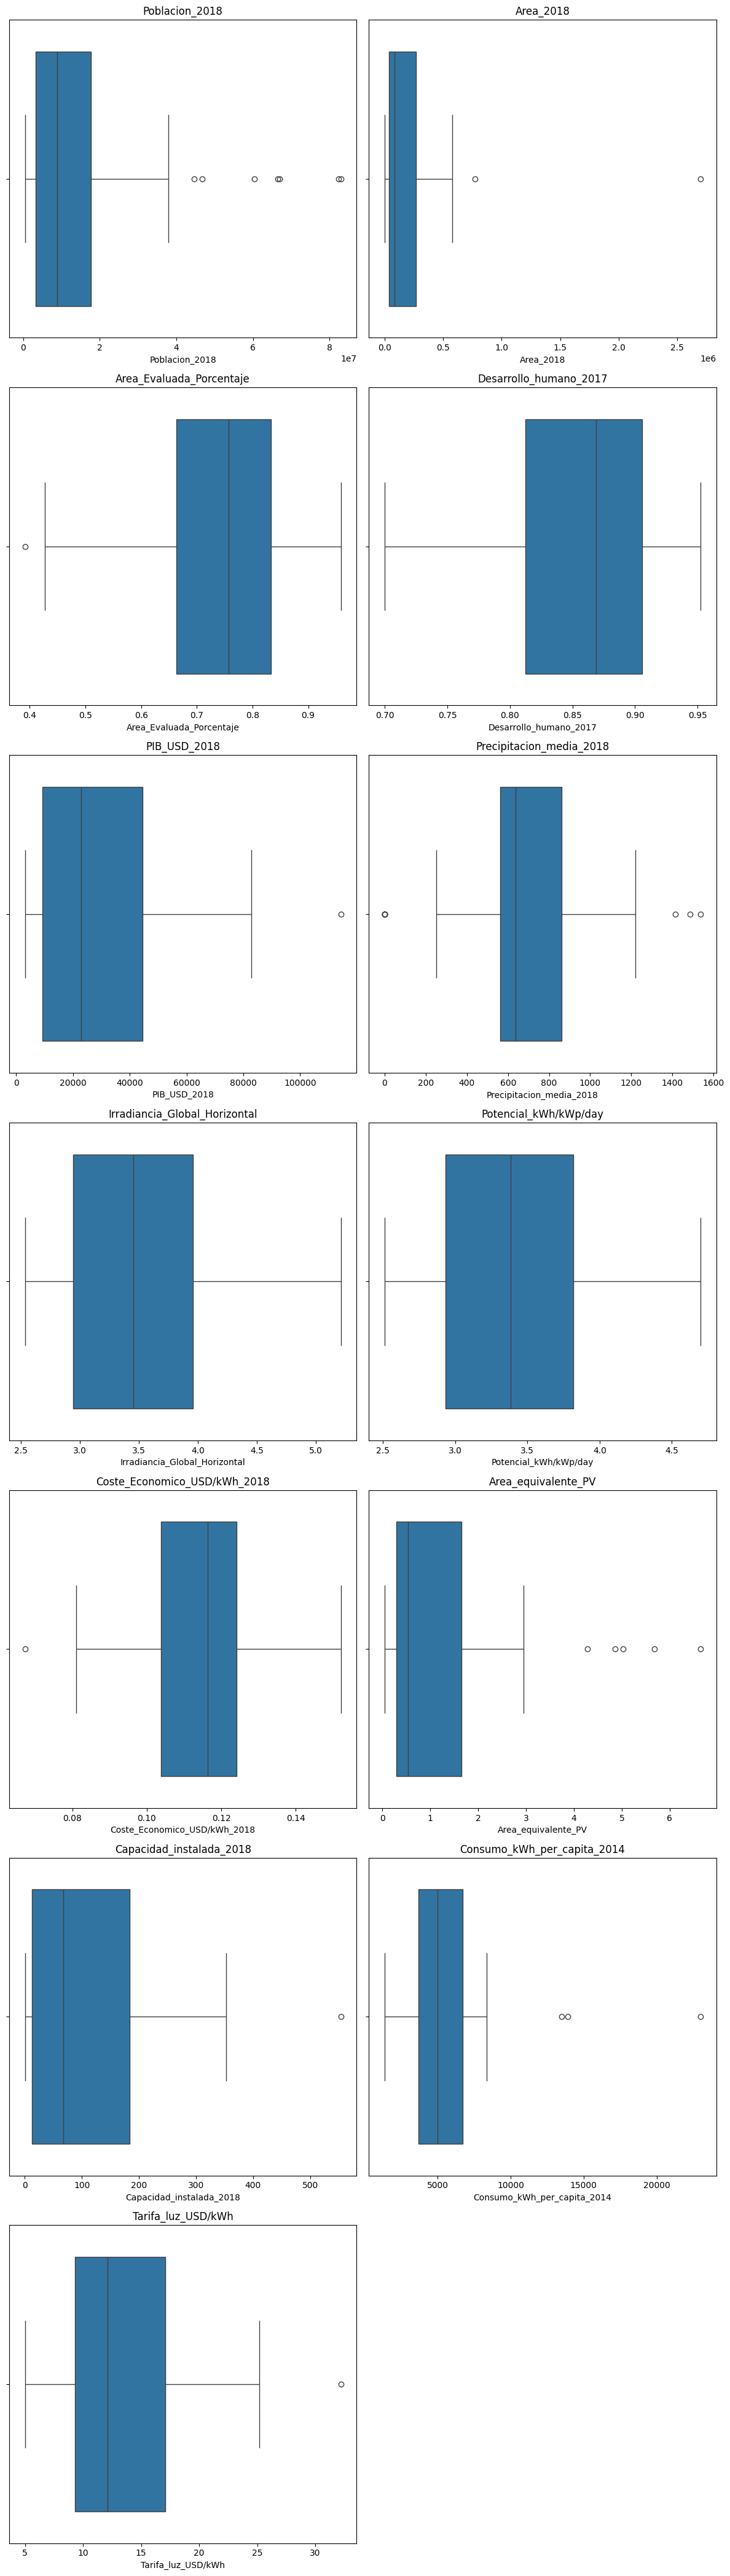

In [427]:
plot_multiple_boxplots(df_eu_final, df_eu_final.columns, dim_matriz_visual = 2)

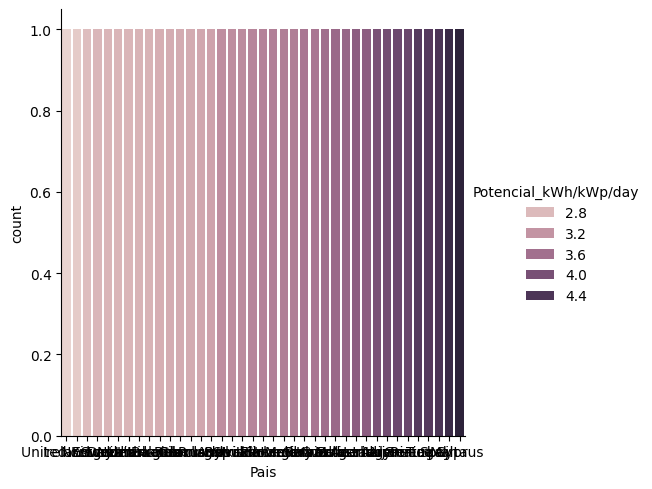

In [428]:
#Grafico barras
sns.catplot(x = "Pais",
            hue = "Potencial_kWh/kWp/day",
            kind = "count",
            data = df_eu_final.sort_values("Potencial_kWh/kWp/day"))
#Como la grafica es inentendible, voy a quedarme con los 10 paises con mayor potencia de energia y economica
#Y con eso ya repetimos los gráficos.


In [429]:
df_eu_potencial = df_eu_final.sort_values(by = "Potencial_kWh/kWp/day",ascending= False )
df_eu_potencial_slicing = df_eu_potencial.head(10)
df_eu_potencial_slicing

,Poblacion_2018,Area_2018,Area_Evaluada_Porcentaje,Desarrollo_humano_2017,PIB_USD_2018,Precipitacion_media_2018,Irradiancia_Global_Horizontal,Potencial_kWh/kWp/day,Coste_Economico_USD/kWh_2018,Area_equivalente_PV,Capacidad_instalada_2018,Consumo_kWh_per_capita_2014,Tarifa_luz_USD/kWh
Pais,,,,,,,,,,,,,
Cyprus,1189265,9240.0,0.883055,0.868784,28159.301700,498.0,5.2104,4.6983,0.0905,0.292,95.016670,3624.971253,14.9
Malta,483530,320.0,0.694323,0.878187,30074.741185,560.0,5.0071,4.5618,0.0930,4.866,263.272186,4924.544019,17.0
Spain,46723749,499564.0,0.854934,0.891020,30523.859239,636.0,4.5754,4.4127,0.0810,0.352,101.526528,5355.987006,24.8
Turkey,82319724,769630.0,0.787930,0.790634,9311.366117,0.0,4.5979,4.3232,0.0824,0.230,61.502879,2847.126383,10.1
Portugal,10281762,91606.0,0.916908,0.847113,23145.734956,854.0,4.5656,4.3155,0.0826,0.375,65.183380,4662.600800,25.2
Greece,10727668,128900.0,0.713319,0.869934,20324.253564,652.0,4.4501,4.1430,0.0861,0.324,247.164621,5062.606422,19.5
Armenia,2951776,28470.0,0.694657,0.755113,4212.070943,562.0,4.2241,4.1063,0.1038,0.169,5.860878,1961.610395,7.6
Albania,2866376,27400.0,0.614858,0.784911,5253.630064,1485.0,4.1954,4.0426,0.1051,0.210,0.348873,2309.366503,8.7
Italy,60431283,294140.0,0.702332,0.879769,34318.351124,832.0,4.0721,3.9933,0.0673,0.917,332.940143,5002.406680,19.3


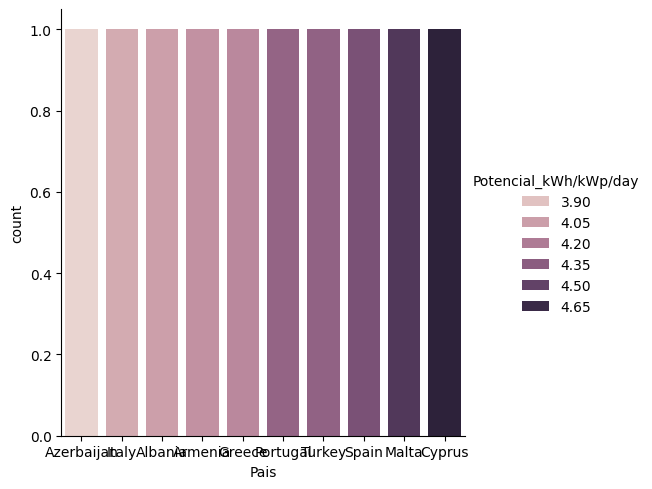

In [430]:
#Grafico barras 
sns.catplot(x = "Pais",
            hue = "Potencial_kWh/kWp/day",
            kind = "count",
            data = df_eu_potencial_slicing.sort_values("Potencial_kWh/kWp/day"))
#No funciona bien, buscar otro

<Axes: xlabel='Pais', ylabel='Potencial_kWh/kWp/day'>

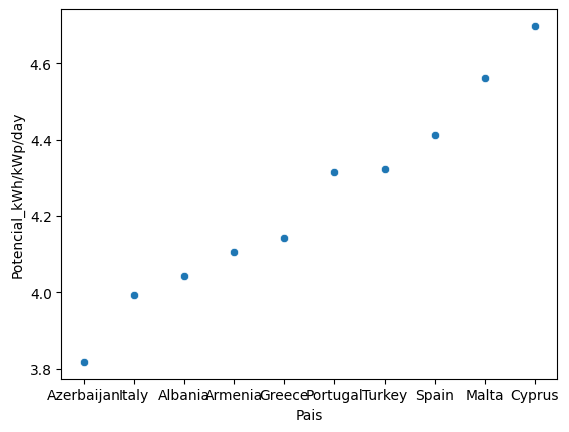

In [431]:
#Grafico dispersion
sns.scatterplot(x = "Pais",
                y= "Potencial_kWh/kWp/day",
                data = df_eu_potencial_slicing.sort_values("Potencial_kWh/kWp/day"))

<Axes: xlabel='Capacidad_instalada_2018', ylabel='Potencial_kWh/kWp/day'>

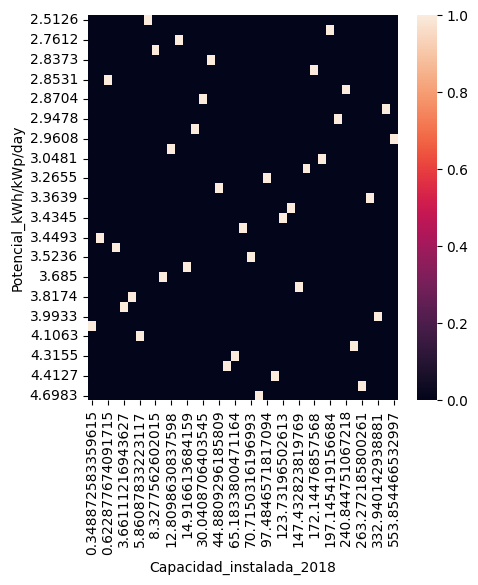

In [432]:
#Tabla de contingencias potencial - capacidad instalada
tabla_contigencia = pd.crosstab(df_eu_final["Potencial_kWh/kWp/day"], 
                                df_eu_final["Capacidad_instalada_2018"])

tabla_contigencia
#Mapa calor
plt.figure(figsize=(5,5))
sns.heatmap(tabla_contigencia)

<Axes: xlabel='Capacidad_instalada_2018', ylabel='Coste_Economico_USD/kWh_2018'>

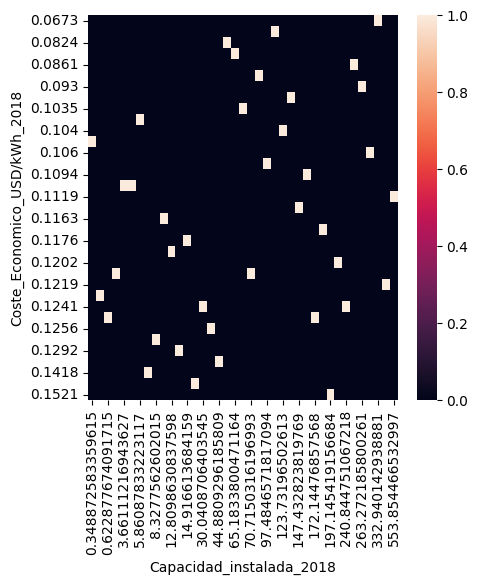

In [433]:
#Tabla de contingencias coste - capacidad instalada
tabla_contigencia = pd.crosstab(df_eu_final["Coste_Economico_USD/kWh_2018"], 
                                df_eu_final["Capacidad_instalada_2018"])

tabla_contigencia
#Mapa calor
plt.figure(figsize=(5,5))
sns.heatmap(tabla_contigencia)

<Axes: xlabel='Potencial_kWh/kWp/day', ylabel='Coste_Economico_USD/kWh_2018'>

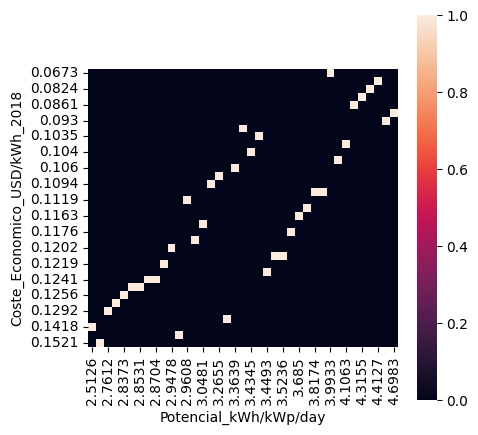

In [434]:
#Tabla de contingencias coste - capacidad instalada
tabla_contigencia = pd.crosstab(df_eu_final["Coste_Economico_USD/kWh_2018"].sort_values(ascending=False), 
                                df_eu_final["Potencial_kWh/kWp/day"])

tabla_contigencia
#Mapa calor
plt.figure(figsize=(5,5))
sns.heatmap(tabla_contigencia,
            square=True)

<Axes: >

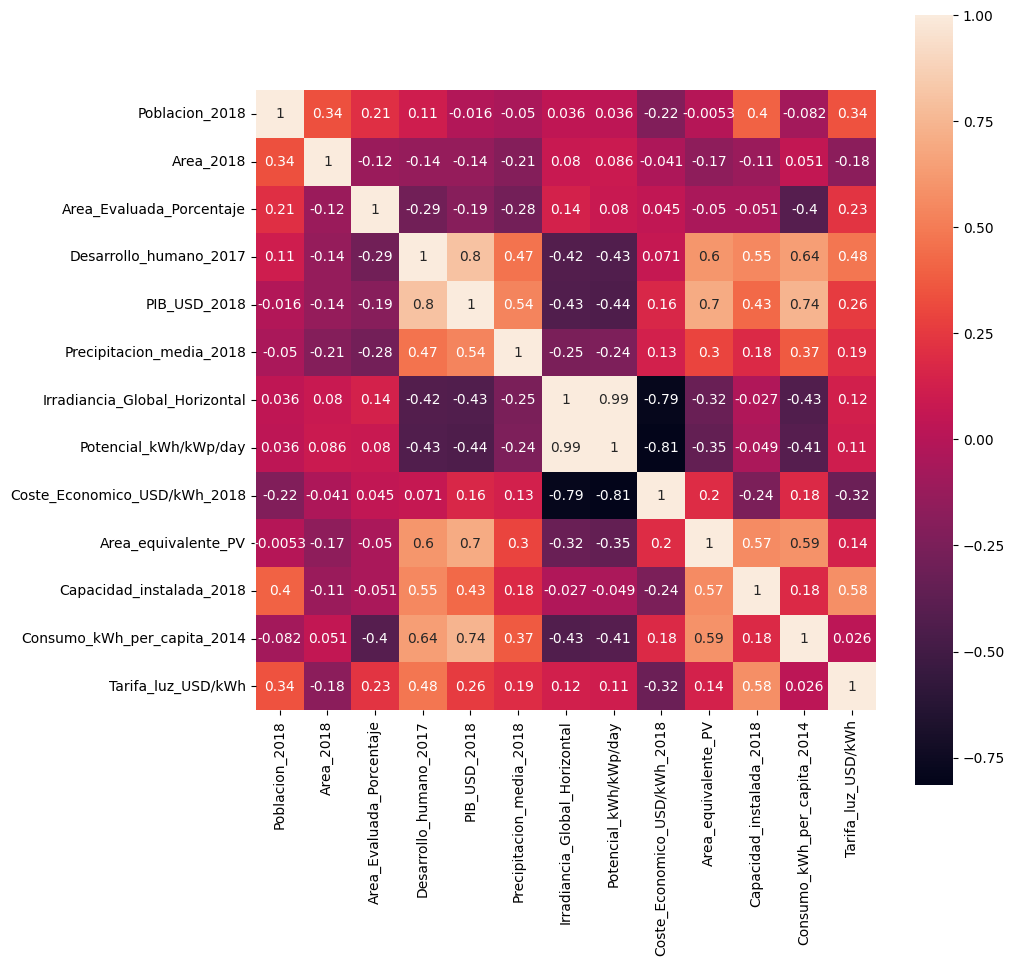

In [435]:
#Tabla de contingencias coste - capacidad instalada
matriz_correlacion = df_eu_final.corr()

matriz_correlacion
#Mapa calor
plt.figure(figsize=(10,10))
sns.heatmap(matriz_correlacion,
            square=True, 
            annot=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_18572\3567139233.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)


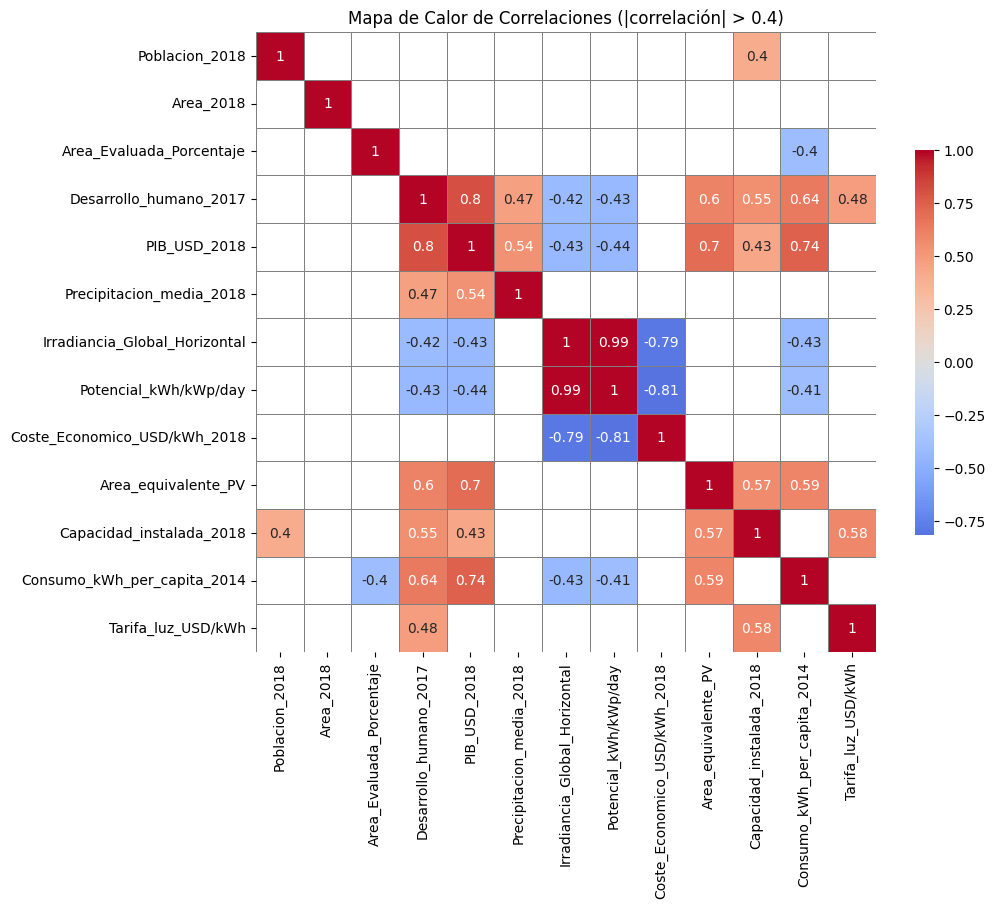

In [445]:
#Ver matriz de correlaciones solo valores más representativos

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def mapa_calor_correlacion( df,porcentaje):
    # Supongamos que df_eu es tu DataFrame y ya has calculado la matriz de correlación
    matriz_correlacion = df.corr()

    # Filtrar la matriz de correlación para dejar solo valores superiores a 0.5 o inferiores a -0.5
    filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)

    # Crear el mapa de calor
    plt.figure(figsize=(10, 10))
    sns.heatmap(filtro_correlacion,
                square=True, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                cbar_kws={'shrink': .5},
                linewidths=.5,
                linecolor='gray')

    plt.title(f'Mapa de Calor de Correlaciones (|correlación| > {porcentaje})')
    return plt.show()

mapa_calor_correlacion(df_eu_final, 0.4)

# Conclusion
1. Si la irraciancia es casi igual que la energia potencial, significa que las plantas obtienen los mismos niveles de producción independientemente del pais
2. El coste economico de construir la planta y mantenerla es lo que determina junto con la potencia en qué paises se construira
3. El area del pais no tiene que ver, para colocar plantas fotovoltaicas
4. El PIB si que tiene una relación con las areas con instalaciones fotovoltaicas, 
5. Ver el consumo per capita
6. El aumento de precipitacion solo indica que hacen más consumo de luz


In [437]:
df_eu_final.columns


Index(['Poblacion_2018', 'Area_2018', 'Area_Evaluada_Porcentaje',
       'Desarrollo_humano_2017', 'PIB_USD_2018', 'Precipitacion_media_2018',
       'Irradiancia_Global_Horizontal', 'Potencial_kWh/kWp/day',
       'Coste_Economico_USD/kWh_2018', 'Area_equivalente_PV',
       'Capacidad_instalada_2018', 'Consumo_kWh_per_capita_2014',
       'Tarifa_luz_USD/kWh'],
      dtype='object')

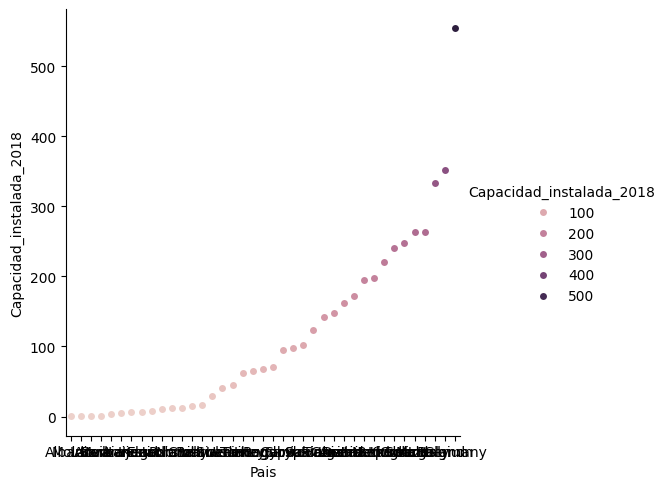

In [438]:
sns.catplot(data=df_eu_final.sort_values("Capacidad_instalada_2018"),
            hue= 'Capacidad_instalada_2018',
              x='Pais',
              y= 'Capacidad_instalada_2018')

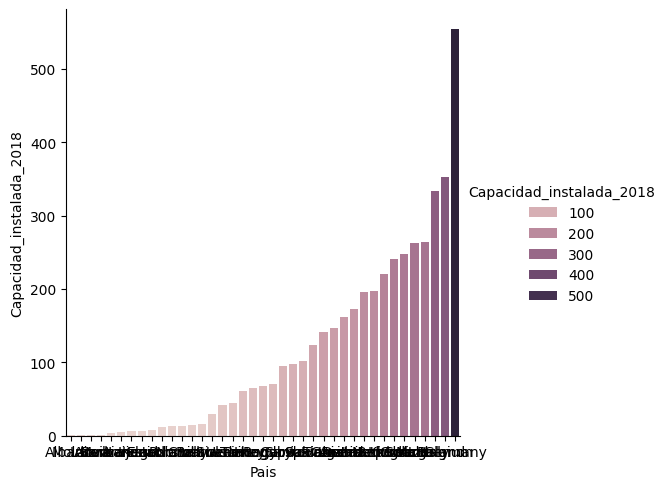

In [439]:
sns.catplot(data=df_eu_final.sort_values("Capacidad_instalada_2018"),
            hue= 'Capacidad_instalada_2018',
              x='Pais',
              y= 'Capacidad_instalada_2018',
              kind = "bar")

In [440]:
#Haciendo separacion entre los 7 con más capacidad instalada
df_eu_capacidad_upper = df_eu_final.sort_values(by = "Capacidad_instalada_2018",ascending= False )
df_eu_capacidad_upper_slicing = df_eu_capacidad_upper.head(7)
df_eu_capacidad_upper_slicing


,Poblacion_2018,Area_2018,Area_Evaluada_Porcentaje,Desarrollo_humano_2017,PIB_USD_2018,Precipitacion_media_2018,Irradiancia_Global_Horizontal,Potencial_kWh/kWp/day,Coste_Economico_USD/kWh_2018,Area_equivalente_PV,Capacidad_instalada_2018,Consumo_kWh_per_capita_2014,Tarifa_luz_USD/kWh
Pais,,,,,,,,,,,,,
Germany,82927922,349360.0,0.734343,0.936043,48195.579904,700.0,2.9777,2.9608,0.1119,2.954,553.854467,7035.482975,32.2
Belgium,11422068,30280.0,0.785623,0.916066,46556.099567,847.0,2.9436,2.9164,0.1219,5.026,352.440556,7709.123078,15.8
Italy,60431283,294140.0,0.702332,0.879769,34318.351124,832.0,4.0721,3.9933,0.0673,0.917,332.940143,5002.406680,19.3
Switzerland,8516543,39516.0,0.391344,0.943998,82838.929445,1537.0,3.3567,3.3639,0.1060,2.129,263.722029,7520.166025,12.3
Malta,483530,320.0,0.694323,0.878187,30074.741185,560.0,5.0071,4.5618,0.0930,4.866,263.272186,4924.544019,17.0
Greece,10727668,128900.0,0.713319,0.869934,20324.253564,652.0,4.4501,4.1430,0.0861,0.324,247.164621,5062.606422,19.5
Netherlands,17231017,33690.0,0.822191,0.930639,53024.059213,778.0,2.8649,2.8647,0.1241,6.646,240.844751,6712.774758,10.6


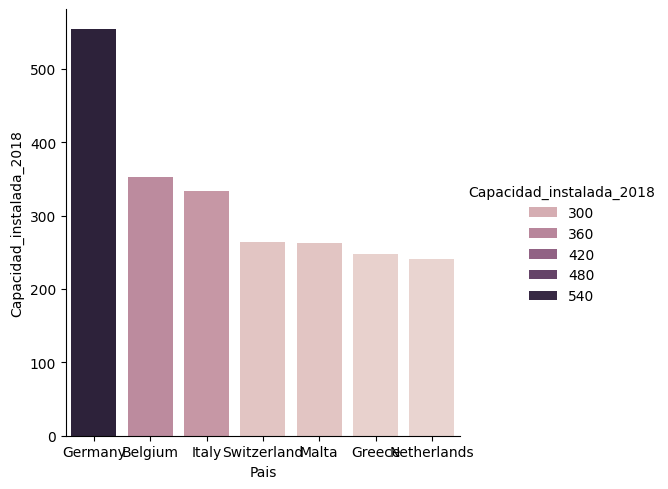

In [441]:
#7 PAISES CON MÁS CAPACIDAD INSTALADA
sns.catplot(data= df_eu_capacidad_upper_slicing.sort_values(by="Capacidad_instalada_2018",ascending= False),
            hue= 'Capacidad_instalada_2018',
            x='Pais',
            y= 'Capacidad_instalada_2018',
            kind= "bar")

C:\Users\USER\AppData\Local\Temp\ipykernel_18572\3567139233.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)


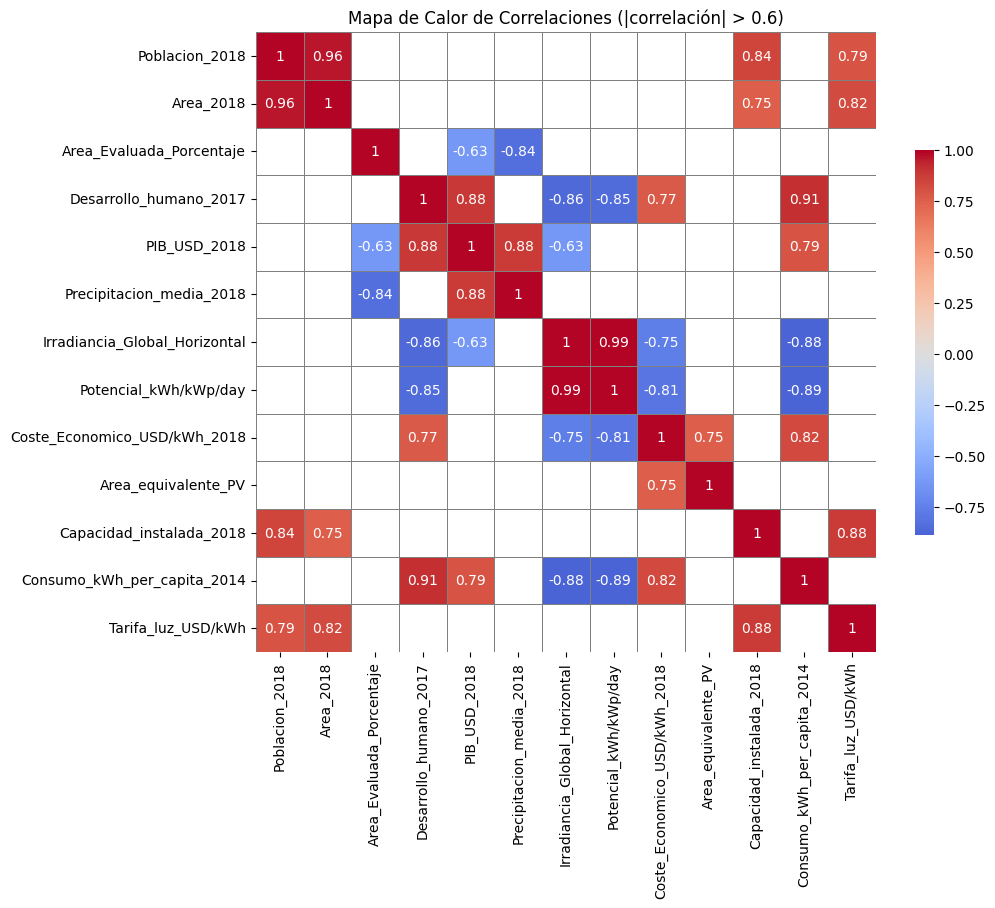

In [450]:
mapa_calor_correlacion(df_eu_capacidad_upper_slicing, 0.6)

In [ ]:
#Relaciones a estudiar en grafico de dispersión con burbujas, x pais, burbuja variables, y capacidad
''' 
1. Tarifa luz vs Capacidad
2. Poblacion vs Capacidad
3. Area vs Capacidad (No es necesario porque población y area están muy similar)
________________

'''

<Axes: xlabel='Pais', ylabel='Tarifa_luz_USD/kWh'>

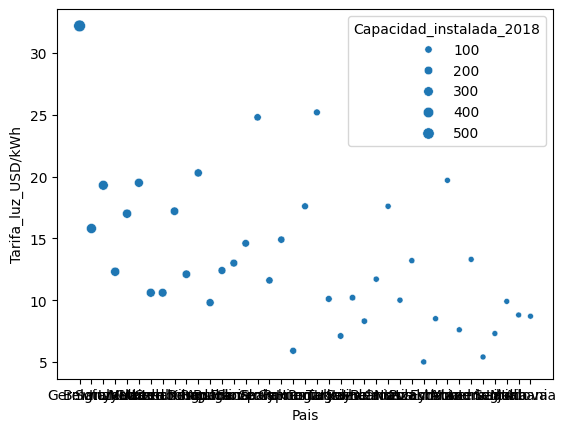

In [455]:
sns.scatterplot(x = "Pais",
                y = "Tarifa_luz_USD/kWh",
                size = df_eu_capacidad_upper["Capacidad_instalada_2018"],
                data = df_eu_capacidad_upper)

<Axes: xlabel='Capacidad_instalada_2018', ylabel='Tarifa_luz_USD/kWh'>

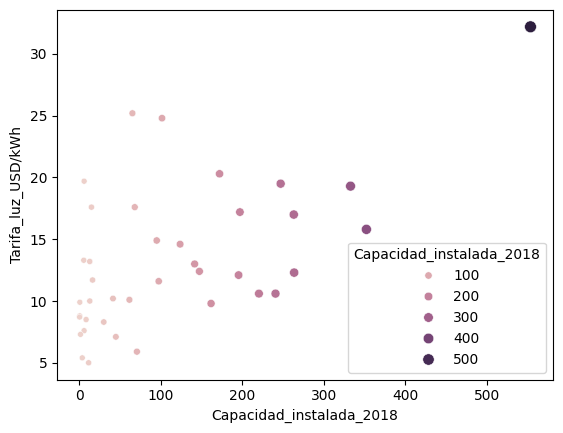

In [460]:
sns.scatterplot(x = "Capacidad_instalada_2018",
                y = "Tarifa_luz_USD/kWh",
                size = df_eu_capacidad_upper["Capacidad_instalada_2018"],
                hue = df_eu_capacidad_upper["Capacidad_instalada_2018"],
                data = df_eu_capacidad_upper)

<Axes: xlabel='Capacidad_instalada_2018', ylabel='Poblacion_2018'>

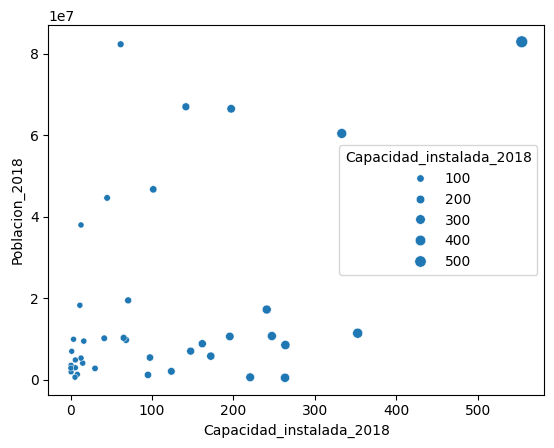

In [459]:
sns.scatterplot(x = "Capacidad_instalada_2018",
                y = "Poblacion_2018",
                size = df_eu_capacidad_upper["Capacidad_instalada_2018"],
                data = df_eu_capacidad_upper)

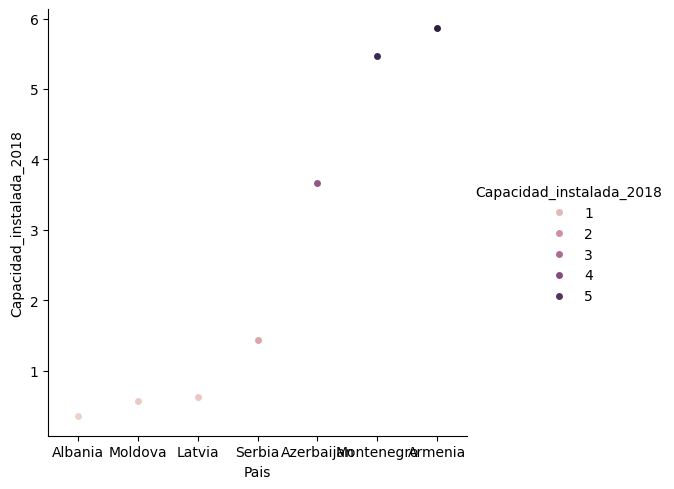

In [442]:
#7 PAISES CON MENOS CAPACIDAD INSTALADA
df_eu_capacidad_lower = df_eu_final.sort_values(by = "Capacidad_instalada_2018",ascending= True )
df_eu_capacidad_lower_slicing = df_eu_capacidad_lower.head(7)
sns.catplot(data=df_eu_capacidad_lower_slicing.sort_values(by="Capacidad_instalada_2018",ascending= True),
            hue= 'Capacidad_instalada_2018',
              x='Pais',
              y= 'Capacidad_instalada_2018')

C:\Users\USER\AppData\Local\Temp\ipykernel_18572\3567139233.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)


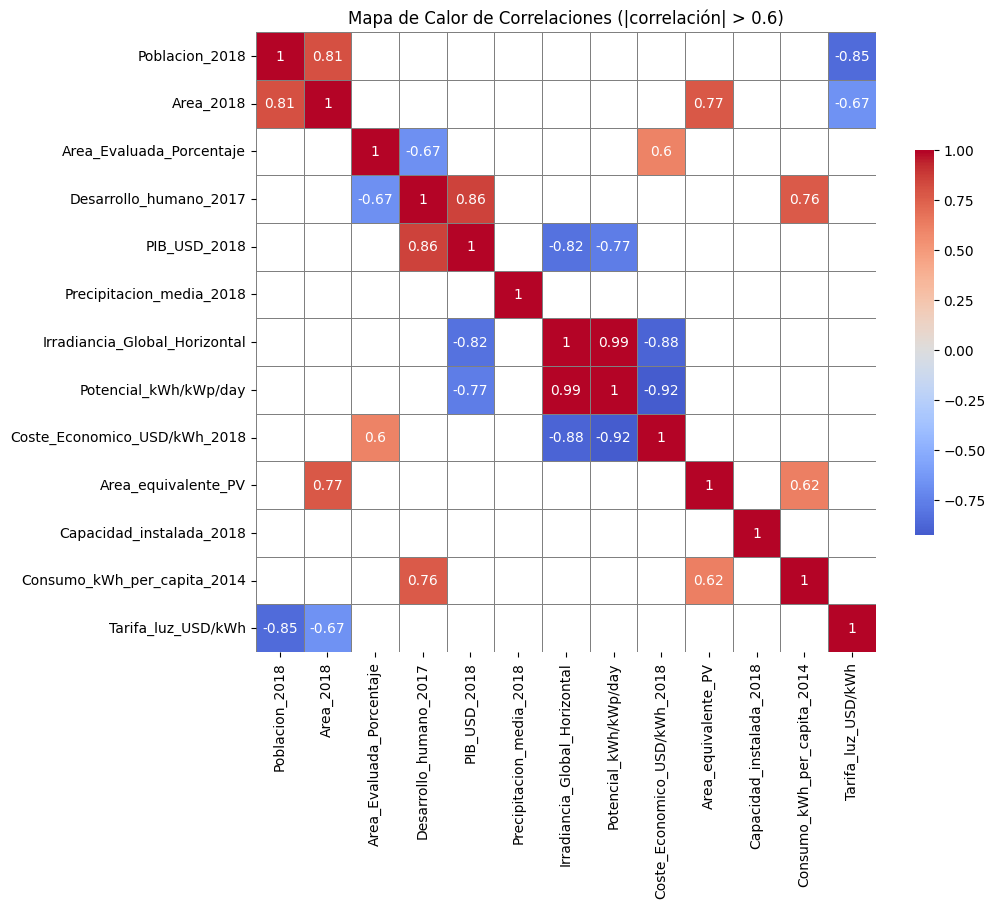

In [449]:
mapa_calor_correlacion(df_eu_capacidad_lower_slicing, 0.6)

In [ ]:
#Relaciones a estudiar en grafico de dispersión con burbujas, x pais, burbuja variables, y capacidad
''' 
La baja de poca capacidad instalada no depende de nada aparentemente,parametros opuestos al precio de la luz y poblacion
El desarrollo humano puede ser más bajo?
Hay baja irradiancia?


'''
#Relaciones a estudiar en grafico de dispersión con burbujas, x pais, burbuja variables, y capacidad
''' 
1. Irradiancia vs Capacidad
2. Desarrollo humano vs Capacidad
________________

'''

In [461]:
df_eu_final.columns

Index(['Poblacion_2018', 'Area_2018', 'Area_Evaluada_Porcentaje',
       'Desarrollo_humano_2017', 'PIB_USD_2018', 'Precipitacion_media_2018',
       'Irradiancia_Global_Horizontal', 'Potencial_kWh/kWp/day',
       'Coste_Economico_USD/kWh_2018', 'Area_equivalente_PV',
       'Capacidad_instalada_2018', 'Consumo_kWh_per_capita_2014',
       'Tarifa_luz_USD/kWh'],
      dtype='object')

<Axes: xlabel='Capacidad_instalada_2018', ylabel='Irradiancia_Global_Horizontal'>

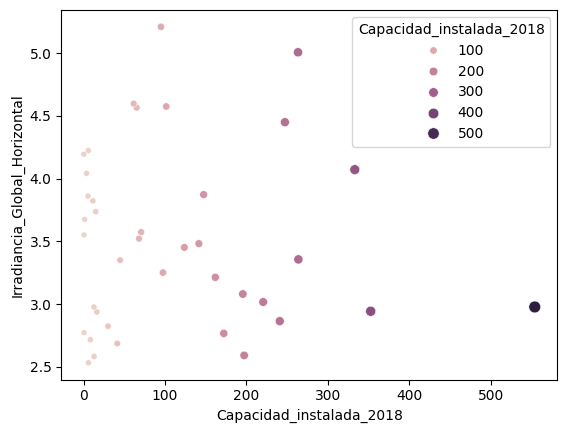

In [462]:
sns.scatterplot(x = "Capacidad_instalada_2018",
                y = "Irradiancia_Global_Horizontal",
                size = df_eu_capacidad_upper["Capacidad_instalada_2018"],
                hue = df_eu_capacidad_upper["Capacidad_instalada_2018"],
                data = df_eu_capacidad_upper)


<Axes: xlabel='Capacidad_instalada_2018', ylabel='Desarrollo_humano_2017'>

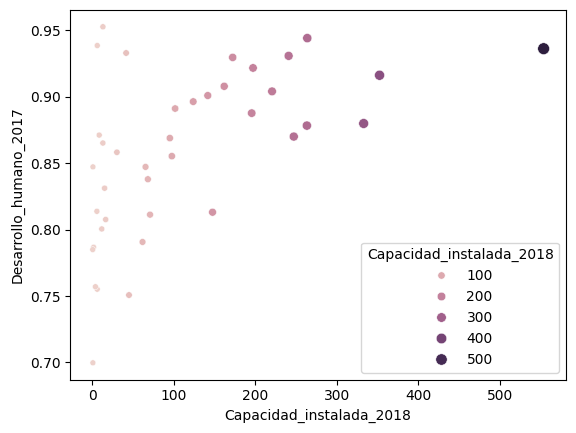

In [463]:
sns.scatterplot(x = "Capacidad_instalada_2018",
                y = "Desarrollo_humano_2017",
                size = df_eu_capacidad_upper["Capacidad_instalada_2018"],
                hue = df_eu_capacidad_upper["Capacidad_instalada_2018"],
                data = df_eu_capacidad_upper)

<Axes: xlabel='Capacidad_instalada_2018', ylabel='Precipitacion_media_2018'>

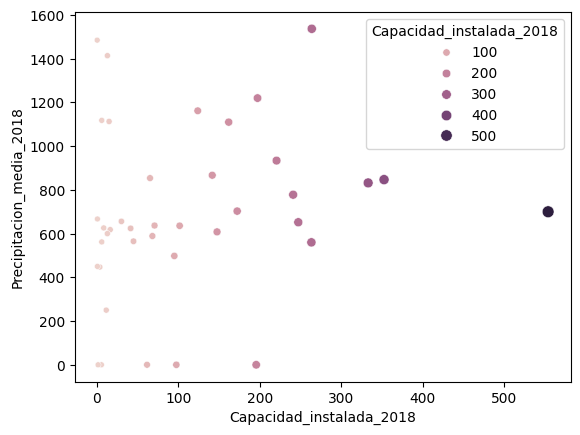

In [464]:
sns.scatterplot(x = "Capacidad_instalada_2018",
                y = "Precipitacion_media_2018",
                size = df_eu_capacidad_upper["Capacidad_instalada_2018"],
                hue = df_eu_capacidad_upper["Capacidad_instalada_2018"],
                data = df_eu_capacidad_upper)

<Axes: xlabel='Capacidad_instalada_2018', ylabel='PIB_USD_2018'>

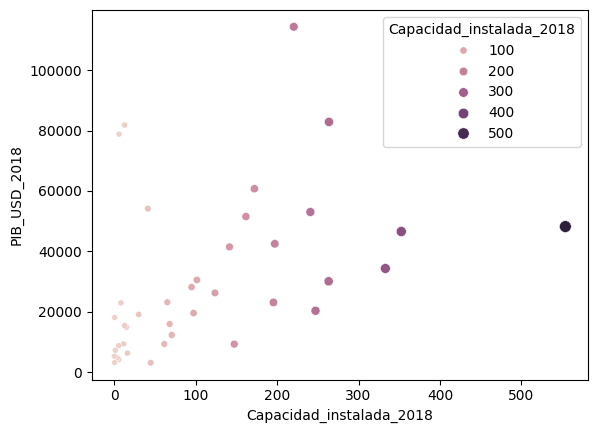

In [465]:
sns.scatterplot(x = "Capacidad_instalada_2018",
                y = "PIB_USD_2018",
                size = df_eu_capacidad_upper["Capacidad_instalada_2018"],
                hue = df_eu_capacidad_upper["Capacidad_instalada_2018"],
                data = df_eu_capacidad_upper)

<Axes: xlabel='Capacidad_instalada_2018', ylabel='Coste_Economico_USD/kWh_2018'>

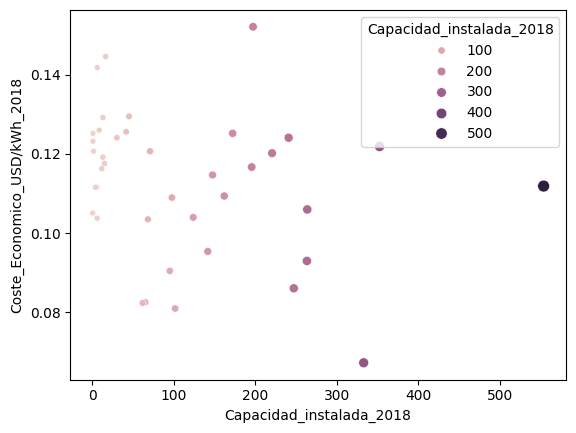

In [466]:
sns.scatterplot(x = "Capacidad_instalada_2018",
                y = "Coste_Economico_USD/kWh_2018",
                size = df_eu_capacidad_upper["Capacidad_instalada_2018"],
                hue = df_eu_capacidad_upper["Capacidad_instalada_2018"],
                data = df_eu_capacidad_upper)

7. Concluye con tu análisis si estabas o no en lo cierto acerca de tu planteamiento y tu hipótesis.

8. (Bonus track). Crea un dashboard para representar tu análisis exploratorio.

9. Documenta tu proyecto y súbelo a GitHub.